# Import Library

In [55]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import csv

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Data Exploration 

In [56]:
filenames = []
for file in os.listdir('F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/'):
    filenames.append(os.path.join('F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/', file))

In [57]:
filenames[0:5]

['F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/1118534.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/1118535.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/1118537.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/1118538.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssm/data/1118540.yaml']

In [58]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = final_df.append(df)
        counter+=1
        
final_df

100%|██████████| 182/182 [00:44<00:00,  4.06it/s]


,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.competition,info.dates,info.gender,info.match_type,...,info.registry.people.BJ Diamanti,info.registry.people.BJ Watling,info.registry.people.CP Tremain,info.registry.people.DM Quested,info.registry.people.JJ Boult,info.registry.people.PD Jones,info.registry.people.PG Fulton,info.registry.people.SB Styris,info.registry.people.JD Hickey,info.registry.people.JO Holder
0,"[{'1st innings': {'team': 'Central Districts',...",0.91,2021-03-02,1,6,Auckland,Super Smash,[2017-12-13],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Canterbury', 'deliv...",0.91,2021-03-04,1,6,Christchurch,Super Smash,[2017-12-14],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Northern Districts'...,0.91,2021-03-05,1,6,Mount Maunganui,Super Smash,[2017-12-16],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Central Districts',...",0.91,2021-03-05,1,6,Nelson,Super Smash,[2017-12-17],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Northern Districts'...,0.91,2021-03-05,1,6,Wellington,Super Smash,[2017-12-20],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Canterbury', 'deliv...",0.92,2023-02-14,1,6,Christchurch,Super Smash,[2023-02-11],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Wellington', 'deliv...",0.91,2021-03-05,1,6,Dunedin,HRV Cup,[2013-01-20],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Auckland', 'deliver...",0.91,2021-03-05,1,6,Auckland,HRV Twenty20,[2014-01-03],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Northern Districts'...,0.91,2021-03-05,1,6,Hamilton,HRV Twenty20,[2014-01-17],male,T20,...,549aefcd,928670cc,96824e68,bb312212,3b298ff2,169be239,10a2a1ff,57efa3be,NaN,NaN


# data store

In [59]:
#data store as pickle file
pickle.dump(final_df, open('cse499_ssm_male.pkl','wb'))

# data load

In [60]:
final_df = pickle.load(open('cse499_ssm_male.pkl','rb'))
final_df.head()

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.competition,info.dates,info.gender,info.match_type,...,info.registry.people.BJ Diamanti,info.registry.people.BJ Watling,info.registry.people.CP Tremain,info.registry.people.DM Quested,info.registry.people.JJ Boult,info.registry.people.PD Jones,info.registry.people.PG Fulton,info.registry.people.SB Styris,info.registry.people.JD Hickey,info.registry.people.JO Holder
0,"[{'1st innings': {'team': 'Central Districts',...",0.91,2021-03-02,1,6,Auckland,Super Smash,[2017-12-13],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Canterbury', 'deliv...",0.91,2021-03-04,1,6,Christchurch,Super Smash,[2017-12-14],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Northern Districts'...,0.91,2021-03-05,1,6,Mount Maunganui,Super Smash,[2017-12-16],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Central Districts',...",0.91,2021-03-05,1,6,Nelson,Super Smash,[2017-12-17],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Northern Districts'...,0.91,2021-03-05,1,6,Wellington,Super Smash,[2017-12-20],male,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing and Analysis

In [62]:
final_df = final_df[[
    'match_id',
    'innings',
    'info.dates',
    'info.gender',
    'info.match_type',
    'info.teams',
    'info.toss.winner',
    'info.toss.decision',
    'info.outcome.winner',
    'info.outcome.by.runs',
    'info.outcome.by.wickets',
    'info.overs',
    'info.umpires',
    'info.venue',
    'info.city'
]]

final_df.head()

,match_id,innings,info.dates,info.gender,info.match_type,info.teams,info.toss.winner,info.toss.decision,info.outcome.winner,info.outcome.by.runs,info.outcome.by.wickets,info.overs,info.umpires,info.venue,info.city
0,1,"[{'1st innings': {'team': 'Central Districts',...",[2017-12-13],male,T20,"[Auckland, Central Districts]",Central Districts,bat,Auckland,NaN,5.0,20,"[SB Haig, WR Knights]",Eden Park Outer Oval,Auckland
0,2,"[{'1st innings': {'team': 'Canterbury', 'deliv...",[2017-12-14],male,T20,"[Canterbury, Otago]",Canterbury,bat,Canterbury,134.0,NaN,20,"[DJ Walker, TJ Parlane]",Hagley Oval,Christchurch
0,3,[{'1st innings': {'team': 'Northern Districts'...,[2017-12-16],male,T20,"[Northern Districts, Auckland]",Northern Districts,bat,Northern Districts,7.0,NaN,20,"[BF Bowden, WR Knights]",Bay Oval,Mount Maunganui
0,4,"[{'1st innings': {'team': 'Central Districts',...",[2017-12-17],male,T20,"[Central Districts, Canterbury]",Central Districts,bat,Central Districts,8.0,NaN,20,"[A Mehrotra, JAK Bromley]",Saxton Oval,Nelson
0,5,[{'1st innings': {'team': 'Northern Districts'...,[2017-12-20],male,T20,"[Northern Districts, Wellington]",Northern Districts,bat,Northern Districts,1.0,NaN,20,"[DJ Walker, TJ Parlane]",Basin Reserve,Wellington


In [63]:
final_df['info.gender'].value_counts()

male    182
Name: info.gender, dtype: int64

In [64]:
final_df['info.match_type'].value_counts()

T20    182
Name: info.match_type, dtype: int64

In [65]:
final_df['info.overs'].value_counts()

20    182
Name: info.overs, dtype: int64

In [66]:
# Remove 50 over match data
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df.shape

(182, 13)

# extract first & second innings data

In [67]:
# No Result Matches
final_df[final_df['info.outcome.winner'].isnull()]

,match_id,innings,info.dates,info.gender,info.teams,info.toss.winner,info.toss.decision,info.outcome.winner,info.outcome.by.runs,info.outcome.by.wickets,info.umpires,info.venue,info.city
0,38,"[{'1st innings': {'team': 'Auckland', 'deliver...",[2019-01-13],male,"[Auckland, Otago]",Otago,field,NaN,NaN,NaN,"[JM Dempsey, SB Haig]",University Oval,Dunedin
0,59,"[{'1st innings': {'team': 'Canterbury', 'deliv...",[2019-12-17],male,"[Canterbury, Auckland]",Auckland,field,NaN,NaN,NaN,"[JAK Bromley, SB Haig]",Hagley Oval,Christchurch
0,61,"[{'1st innings': {'team': 'Otago', 'deliveries...",[2019-12-19],male,"[Otago, Auckland]",Auckland,field,NaN,NaN,NaN,"[DJ Walker, SB Haig]",University Oval,Dunedin
0,62,"[{'1st innings': {'team': 'Central Districts',...",[2019-12-20],male,"[Central Districts, Northern Districts]",Central Districts,bat,NaN,NaN,NaN,"[CM Brown, WR Knights]",Seddon Park,Hamilton
0,122,[{'1st innings': {'team': 'Northern Districts'...,[2021-12-03],male,"[Northern Districts, Otago]",Otago,field,NaN,NaN,NaN,"[CM Brown, Damian Morrow]","Seddon Park, Hamilton",Hamilton
0,160,"[{'1st innings': {'team': 'Otago', 'deliveries...",[2023-01-02],male,"[Otago, Auckland]",Auckland,field,NaN,NaN,NaN,"[Glen Walklin, WR Knights]","Eden Park Outer Oval, Auckland",Auckland


# remove no result matches

In [68]:
final_df = final_df.dropna(subset=['info.outcome.winner'])
final_df.shape

(176, 13)

In [69]:
final_df.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'non_striker': 'GH Worker',
   'bowler': 'AT Nidamanuru',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'JD Ryder'}},
 {0.2: {'non_striker': 'GH Worker',
   'bowler': 'AT Nidamanuru',
   'runs': {'extras': 0, 'total': 4, 'batsman': 4},
   'batsman': 'JD Ryder'}},
 {0.3: {'non_striker': 'GH Worker',
   'bowler': 'AT Nidamanuru',
   'extras': {'wides': 2},
   'runs': {'extras': 2, 'total': 2, 'batsman': 0},
   'batsman': 'JD Ryder'}},
 {0.4: {'non_striker': 'JD Ryder',
   'bowler': 'AT Nidamanuru',
   'runs': {'extras': 0, 'total': 4, 'batsman': 4},
   'batsman': 'GH Worker'}},
 {0.5: {'non_striker': 'JD Ryder',
   'bowler': 'AT Nidamanuru',
   'runs': {'extras': 0, 'total': 4, 'batsman': 4},
   'batsman': 'GH Worker'}},
 {0.6: {'non_striker': 'JD Ryder',
   'bowler': 'AT Nidamanuru',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'GH Worker'}},
 {0.7: {'non_striker': 'JD Ryder',
   'bowler': 'AT Nidamanuru',
   'runs': {'extras': 0, 'total'

In [70]:
count = 0
delivery_df_1st_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_1st_innings = delivery_df_1st_innings.append(loop_df)

In [71]:
delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue
0,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Eden Park Outer Oval
1,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Eden Park Outer Oval
2,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Eden Park Outer Oval
3,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Eden Park Outer Oval
4,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Eden Park Outer Oval


In [72]:
count = 0
delivery_df_2nd_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][1]['2nd innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][1]['2nd innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_2nd_innings = delivery_df_2nd_innings.append(loop_df)

In [73]:
delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue
0,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Eden Park Outer Oval
1,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Eden Park Outer Oval
2,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Eden Park Outer Oval
3,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Eden Park Outer Oval
4,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Eden Park Outer Oval


In [74]:
run_data = delivery_df_1st_innings.groupby(['match_id', 'runs'])['runs'].count().reset_index(name="count")

In [75]:
run_data.head()

,match_id,runs,count
0,1,0,38
1,1,1,50
2,1,2,7
3,1,4,23
4,1,6,6


# batting and bowling team separation

In [76]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [77]:
# First Innings
delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings.apply(bowl,axis=1)

delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Eden Park Outer Oval,Auckland
1,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Eden Park Outer Oval,Auckland
2,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Eden Park Outer Oval,Auckland
3,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Eden Park Outer Oval,Auckland
4,1,"[Auckland, Central Districts]",Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Eden Park Outer Oval,Auckland


In [78]:
# Second Innings 
delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings.apply(bowl,axis=1)

delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Eden Park Outer Oval,Central Districts
1,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Eden Park Outer Oval,Central Districts
2,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Eden Park Outer Oval,Central Districts
3,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Eden Park Outer Oval,Central Districts
4,1,"[Auckland, Central Districts]",Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Eden Park Outer Oval,Central Districts


In [79]:
# Drop columns
delivery_df_1st_innings.drop(columns=['teams'],inplace=True)
delivery_df_2nd_innings.drop(columns=['teams'],inplace=True)

In [80]:
delivery_df_1st_innings['batting_team'].unique()

array(['Central Districts', 'Canterbury', 'Northern Districts',
       'Wellington', 'Otago', 'Auckland'], dtype=object)

In [115]:
# First Innings
# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Thunder','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Thunder','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Royals','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Royals','Sylhet Strikers')

# Second Innings
# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Thunder','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Thunder','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Royals','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Royals','Sylhet Strikers')

In [81]:
delivery_df_2nd_innings['batting_team'].unique()

array(['Auckland', 'Otago', 'Canterbury', 'Wellington',
       'Central Districts', 'Northern Districts'], dtype=object)

# venue and city

In [82]:
delivery_df_2nd_innings.isnull().sum()

match_id                0
winner                  0
win_by_runs         10608
win_by_wickets       8915
batting_team            0
ball                    0
runs                    0
player_dismissed        0
city                    0
venue                   0
bowling_team            0
dtype: int64

In [83]:
delivery_df_1st_innings['venue'].unique()

array(['Eden Park Outer Oval', 'Hagley Oval', 'Bay Oval', 'Saxton Oval',
       'Basin Reserve', 'Mainpower Oval', 'Seddon Park', 'Molyneux Park',
       'Pukekura Park', 'University Oval', "Queen's Park", 'McLean Park',
       'Pukekura Park, New Plymouth', 'Hagley Oval, Christchurch',
       'Eden Park Outer Oval, Auckland', 'University Oval, Dunedin',
       'Basin Reserve, Wellington', 'Seddon Park, Hamilton',
       'McLean Park, Napier', 'Bay Oval, Mount Maunganui',
       'Fitzherbert Park, Palmerston North',
       'John Davies Oval, Queenstown', 'Eden Park, Auckland',
       'Cobham Oval (New), Whangarei', 'Saxton Oval, Nelson', 'Eden Park'],
      dtype=object)

In [84]:
delivery_df_1st_innings['city'].unique()

array(['Auckland', 'Christchurch', 'Mount Maunganui', 'Nelson',
       'Wellington', 'Rangiora', 'Hamilton', 'Alexandra', 'New Plymouth',
       'Dunedin', 'Invercargill', 'Napier', 'Palmerston North',
       'Queenstown', 'Whangarei'], dtype=object)

In [85]:
delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isnull()]['venue'].value_counts()

Series([], Name: venue, dtype: int64)

In [86]:
# First Innings
# cities = np.where(delivery_df_1st_innings['city'].isnull(), delivery_df_1st_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_1st_innings['city'])
# delivery_df_1st_innings['city'] = cities

# Second Innings
# cities = np.where(delivery_df_2nd_innings['city'].isnull(), delivery_df_2nd_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_2nd_innings['city'])
# delivery_df_2nd_innings['city'] = cities

In [87]:
# Drop Venue Column

# First Innings
delivery_df_1st_innings.drop(columns=['venue'],inplace=True)
# Second Innings
delivery_df_2nd_innings.drop(columns=['venue'],inplace=True)

In [88]:
delivery_df_1st_innings['city'].value_counts()

Wellington          3710
Auckland            3488
Christchurch        3358
Dunedin             2119
Hamilton            2083
New Plymouth        1955
Mount Maunganui     1450
Napier              1124
Alexandra            744
Queenstown           371
Palmerston North     254
Nelson               249
Invercargill         125
Rangiora             121
Whangarei            112
Name: city, dtype: int64

In [89]:
delivery_df_2nd_innings['city'].value_counts()

Wellington          3469
Auckland            3110
Christchurch        3083
Dunedin             1933
New Plymouth        1828
Hamilton            1810
Mount Maunganui     1416
Napier              1012
Alexandra            705
Queenstown           322
Nelson               255
Palmerston North     250
Rangiora             126
Whangarei            120
Invercargill          84
Name: city, dtype: int64

In [90]:
# Keeping only those venues where played atleast 5 matches

# First Innings
eligible_cities = delivery_df_1st_innings['city'].value_counts()[delivery_df_1st_innings['city'].value_counts() > 300].index.tolist()
delivery_df_1st_innings = delivery_df_1st_innings[delivery_df_1st_innings['city'].isin(eligible_cities)]

# Second Innings
eligible_cities = delivery_df_2nd_innings['city'].value_counts()[delivery_df_2nd_innings['city'].value_counts() > 300].index.tolist()
delivery_df_2nd_innings = delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isin(eligible_cities)]

# current score

In [91]:
# First Innings
delivery_df_1st_innings['current_score'] = delivery_df_1st_innings.groupby('match_id').cumsum()['runs']

# Second Innings
delivery_df_2nd_innings['current_score'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['runs']

In [92]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15


# wicket left

In [93]:
# First Innings
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].astype('int')
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_1st_innings['wickets_left'] = 10 - delivery_df_1st_innings['player_dismissed']

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,1,Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Auckland,0,10
1,1,Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Auckland,4,10
2,1,Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Auckland,6,10
3,1,Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Auckland,10,10
4,1,Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Auckland,14,10


In [94]:
# Second Innings
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].astype('int')
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_2nd_innings['wickets_left'] = 10 - delivery_df_2nd_innings['player_dismissed']

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0,10
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6,10
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11,10
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11,10
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15,10


# bowl delivered & bowl left

In [95]:
# First Innings
delivery_df_1st_innings['over'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_1st_innings['ball_no'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_1st_innings['balls_bowled'] = (delivery_df_1st_innings['over'].astype('int')*6) + delivery_df_1st_innings['ball_no'].astype('int')
delivery_df_1st_innings['balls_left'] = 120 - delivery_df_1st_innings['balls_bowled']
delivery_df_1st_innings['balls_left'] = delivery_df_1st_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,1,Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Auckland,0,10,0,1,1,119
1,1,Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Auckland,4,10,0,2,2,118
2,1,Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Auckland,6,10,0,3,3,117
3,1,Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Auckland,10,10,0,4,4,116
4,1,Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Auckland,14,10,0,5,5,115


In [96]:
# Second Innings
delivery_df_2nd_innings['over'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_2nd_innings['ball_no'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_2nd_innings['balls_bowled'] = (delivery_df_2nd_innings['over'].astype('int')*6) + delivery_df_2nd_innings['ball_no'].astype('int')
delivery_df_2nd_innings['balls_left'] = 120 - delivery_df_2nd_innings['balls_bowled']
delivery_df_2nd_innings['balls_left'] = delivery_df_2nd_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0,10,0,1,1,119
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6,10,0,2,2,118
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11,10,0,3,3,117
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11,10,0,4,4,116
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15,10,0,5,5,115


# current run rate

In [97]:
# First Innings
delivery_df_1st_innings['crr'] = round((delivery_df_1st_innings['current_score']*6)/delivery_df_1st_innings['balls_bowled'], 2)

# Second Innings
delivery_df_2nd_innings['crr'] = round((delivery_df_2nd_innings['current_score']*6)/delivery_df_2nd_innings['balls_bowled'], 2)

In [98]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0,10,0,1,1,119,0.0
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6,10,0,2,2,118,18.0
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11,10,0,3,3,117,22.0
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11,10,0,4,4,116,16.5
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15,10,0,5,5,115,18.0


# Score and Win Probabilty (before the start of the match and during the first innings)

# total score counting according to match

In [99]:
total_df = delivery_df_1st_innings.groupby('match_id').sum()['runs'].reset_index()
score_probability_output = delivery_df_1st_innings.merge(total_df,on='match_id')

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y
0,1,Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Auckland,0,10,0,1,1,119,0.0,192
1,1,Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Auckland,4,10,0,2,2,118,12.0,192
2,1,Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Auckland,6,10,0,3,3,117,12.0,192
3,1,Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Auckland,10,10,0,4,4,116,15.0,192
4,1,Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Auckland,14,10,0,5,5,115,16.8,192


# counting runs in remaining balls

In [100]:
score_probability_output['runs_in_remaining_ball'] = score_probability_output['runs_y'] - score_probability_output['current_score']

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball
0,1,Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Auckland,0,10,0,1,1,119,0.0,192,192
1,1,Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Auckland,4,10,0,2,2,118,12.0,192,188
2,1,Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Auckland,6,10,0,3,3,117,12.0,192,186
3,1,Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Auckland,10,10,0,4,4,116,15.0,192,182
4,1,Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Auckland,14,10,0,5,5,115,16.8,192,178


# consider batting team win

In [101]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

score_probability_output['result_first_innings'] = score_probability_output.apply(result, axis=1)

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball,result_first_innings
0,1,Central Districts,Auckland,NaN,5.0,0.1,0,0,Auckland,Auckland,0,10,0,1,1,119,0.0,192,192,0
1,1,Central Districts,Auckland,NaN,5.0,0.2,4,0,Auckland,Auckland,4,10,0,2,2,118,12.0,192,188,0
2,1,Central Districts,Auckland,NaN,5.0,0.3,2,0,Auckland,Auckland,6,10,0,3,3,117,12.0,192,186,0
3,1,Central Districts,Auckland,NaN,5.0,0.4,4,0,Auckland,Auckland,10,10,0,4,4,116,15.0,192,182,0
4,1,Central Districts,Auckland,NaN,5.0,0.5,4,0,Auckland,Auckland,14,10,0,5,5,115,16.8,192,178,0


# final data for score probabilty 

In [102]:
final_score_probability_df = score_probability_output[['batting_team','bowling_team','city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left','crr', 'runs_in_remaining_ball']]
final_score_probability_df.head()

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Central Districts,Auckland,Auckland,0,1,119,10,0.0,192
1,Central Districts,Auckland,Auckland,4,2,118,10,12.0,188
2,Central Districts,Auckland,Auckland,6,3,117,10,12.0,186
3,Central Districts,Auckland,Auckland,10,4,116,10,15.0,182
4,Central Districts,Auckland,Auckland,14,5,115,10,16.8,178


In [103]:
final_score_probability_df = final_score_probability_df[final_score_probability_df['balls_left'] != 0]
final_score_probability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Central Districts,Auckland,Auckland,0,1,119,10,0.00,192
1,Central Districts,Auckland,Auckland,4,2,118,10,12.00,188
2,Central Districts,Auckland,Auckland,6,3,117,10,12.00,186
3,Central Districts,Auckland,Auckland,10,4,116,10,15.00,182
4,Central Districts,Auckland,Auckland,14,5,115,10,16.80,178
...,...,...,...,...,...,...,...,...,...
20396,Otago,Northern Districts,Hamilton,135,115,5,5,7.04,8
20397,Otago,Northern Districts,Hamilton,135,116,4,5,6.98,8
20398,Otago,Northern Districts,Hamilton,136,117,3,5,6.97,7
20399,Otago,Northern Districts,Hamilton,137,118,2,5,6.97,6


# final innings score probability data extraction

In [104]:
pickle.dump(final_score_probability_df, open('ssm_mens_first_innings_score.pkl','wb'))

# win probabilty

In [105]:
final_win_probability_df = score_probability_output[[
    'batting_team',
    'bowling_team',
    'city',
    'runs_y',
    'result_first_innings'
]]

final_win_probability_df.head()

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Central Districts,Auckland,Auckland,192,0
1,Central Districts,Auckland,Auckland,192,0
2,Central Districts,Auckland,Auckland,192,0
3,Central Districts,Auckland,Auckland,192,0
4,Central Districts,Auckland,Auckland,192,0


# final first innings win data extraction

In [106]:
pickle.dump(final_win_probability_df, open('ssm_mens_first_innings_win.pkl','wb'))

# Win Probabilty (during the second innings)

# target runs from first innings

In [107]:
total_score_df = delivery_df_1st_innings.groupby([
    'match_id',
]).sum()['runs'].reset_index()

total_score_df.head()

,match_id,runs
0,1,192
1,2,217
2,3,214
3,5,145
4,7,212


In [108]:
total_score_df['target_runs'] = total_score_df['runs'] + 1
total_score_df.drop(columns=['runs'], inplace=True)

total_score_df.head()

,match_id,target_runs
0,1,193
1,2,218
2,3,215
3,5,146
4,7,213


# merge with second innings data

In [109]:
final_2nd_innings_win_df = delivery_df_2nd_innings.merge(total_score_df, on='match_id')
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0,10,0,1,1,119,0.0,193
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6,10,0,2,2,118,18.0,193
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11,10,0,3,3,117,22.0,193
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11,10,0,4,4,116,16.5,193
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15,10,0,5,5,115,18.0,193


# runs left

In [110]:
final_2nd_innings_win_df['runs_left'] = final_2nd_innings_win_df['target_runs'] - final_2nd_innings_win_df['current_score']
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0,10,0,1,1,119,0.0,193,193
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6,10,0,2,2,118,18.0,193,187
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11,10,0,3,3,117,22.0,193,182
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11,10,0,4,4,116,16.5,193,182
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15,10,0,5,5,115,18.0,193,178


# required run rate

In [111]:
final_2nd_innings_win_df['rrr'] = round((final_2nd_innings_win_df['runs_left']*6)/final_2nd_innings_win_df['balls_left'], 2)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,0,10,0,1,1,119,0.0,193,193,9.73
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,6,10,0,2,2,118,18.0,193,187,9.51
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,11,10,0,3,3,117,22.0,193,182,9.33
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,11,10,0,4,4,116,16.5,193,182,9.41
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,15,10,0,5,5,115,18.0,193,178,9.29


In [112]:
final_2nd_innings_win_df.isnull().sum()

match_id                0
winner                  0
win_by_runs         10366
win_by_wickets       8322
batting_team            0
ball                    0
runs                    0
player_dismissed        0
city                    0
bowling_team            0
current_score           0
wickets_left            0
over                    0
ball_no                 0
balls_bowled            0
balls_left              0
crr                     0
target_runs             0
runs_left               0
rrr                     1
dtype: int64

In [113]:
final_2nd_innings_win_df = final_2nd_innings_win_df[final_2nd_innings_win_df['balls_left'] != 0]

In [114]:
final_2nd_innings_win_df.isnull().sum()

match_id                0
winner                  0
win_by_runs         10360
win_by_wickets       8267
batting_team            0
ball                    0
runs                    0
player_dismissed        0
city                    0
bowling_team            0
current_score           0
wickets_left            0
over                    0
ball_no                 0
balls_bowled            0
balls_left              0
crr                     0
target_runs             0
runs_left               0
rrr                     0
dtype: int64

# consider batting team win

In [115]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final_2nd_innings_win_df['result'] = final_2nd_innings_win_df.apply(result, axis=1)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,...,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr,result
0,1,Auckland,NaN,5.0,Auckland,0.1,0,0,Auckland,Central Districts,...,10,0,1,1,119,0.0,193,193,9.73,1
1,1,Auckland,NaN,5.0,Auckland,0.2,6,0,Auckland,Central Districts,...,10,0,2,2,118,18.0,193,187,9.51,1
2,1,Auckland,NaN,5.0,Auckland,0.3,5,0,Auckland,Central Districts,...,10,0,3,3,117,22.0,193,182,9.33,1
3,1,Auckland,NaN,5.0,Auckland,0.4,0,0,Auckland,Central Districts,...,10,0,4,4,116,16.5,193,182,9.41,1
4,1,Auckland,NaN,5.0,Auckland,0.5,4,0,Auckland,Central Districts,...,10,0,5,5,115,18.0,193,178,9.29,1


# final data for second innings win

In [116]:
final_2nd_innings_win_df = final_2nd_innings_win_df[[
    'batting_team',
    'bowling_team',
    'city',
    'current_score',
    'target_runs',
    'runs_left',
    'balls_left',
    'wickets_left',
    'crr',
    'rrr',
    'result'
]]

final_2nd_innings_win_df.head()

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Auckland,Central Districts,Auckland,0,193,193,119,10,0.0,9.73,1
1,Auckland,Central Districts,Auckland,6,193,187,118,10,18.0,9.51,1
2,Auckland,Central Districts,Auckland,11,193,182,117,10,22.0,9.33,1
3,Auckland,Central Districts,Auckland,11,193,182,116,10,16.5,9.41,1
4,Auckland,Central Districts,Auckland,15,193,178,115,10,18.0,9.29,1


# final second innings win data extraction

In [117]:
pickle.dump(final_2nd_innings_win_df, open('ssm_mens_second_innings_win.pkl','wb'))

# Machine Learning Model

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

# score probability 

In [119]:
#load data
score_portability_df = pickle.load(open('ssm_mens_first_innings_score.pkl','rb'))
score_portability_df.shape

(20222, 9)

In [120]:
score_portability_df.to_csv(r'ssm_mens_first_innings_score.csv', index=False, header=True)
score_portability_df = pd.read_csv(r'ssm_mens_first_innings_score.csv')

In [121]:
score_portability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Central Districts,Auckland,Auckland,0,1,119,10,0.00,192
1,Central Districts,Auckland,Auckland,4,2,118,10,12.00,188
2,Central Districts,Auckland,Auckland,6,3,117,10,12.00,186
3,Central Districts,Auckland,Auckland,10,4,116,10,15.00,182
4,Central Districts,Auckland,Auckland,14,5,115,10,16.80,178
...,...,...,...,...,...,...,...,...,...
20217,Otago,Northern Districts,Hamilton,135,115,5,5,7.04,8
20218,Otago,Northern Districts,Hamilton,135,116,4,5,6.98,8
20219,Otago,Northern Districts,Hamilton,136,117,3,5,6.97,7
20220,Otago,Northern Districts,Hamilton,137,118,2,5,6.97,6


In [122]:
score_portability_df.isnull().sum()

batting_team              0
bowling_team              0
city                      0
current_score             0
balls_bowled              0
balls_left                0
wickets_left              0
crr                       0
runs_in_remaining_ball    0
dtype: int64

In [123]:
X = score_portability_df.drop(columns=['runs_in_remaining_ball'])
y = score_portability_df['runs_in_remaining_ball'].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [124]:
X_train

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr
7295,Auckland,Central Districts,New Plymouth,83,60,60,8,8.30
12765,Central Districts,Canterbury,Napier,159,103,17,6,9.26
8472,Northern Districts,Canterbury,Christchurch,218,118,2,4,11.08
12244,Canterbury,Wellington,Wellington,106,71,49,8,8.96
14608,Wellington,Canterbury,Wellington,127,105,15,3,7.26
...,...,...,...,...,...,...,...,...
10955,Wellington,Northern Districts,Wellington,132,78,42,9,10.15
17289,Canterbury,Central Districts,New Plymouth,9,6,114,9,9.00
5192,Central Districts,Wellington,Wellington,79,52,68,9,9.12
12172,Canterbury,Wellington,Wellington,4,3,117,10,8.00


In [125]:
y_train

array([127,  24,   1, ...,  82, 149,  27], dtype=int64)

In [126]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'), ['batting_team','bowling_team','city'])
]
,remainder='passthrough')

# XgBoosting

In [127]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=20, random_state=1))
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rou...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                             

In [128]:
y_pred = pipe.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred)))

R-Square Score: 0.9765930429310302
Mean Absolute Error: 3.7511472730591833


In [129]:
predictions_xgb = pipe.predict(X_test)
sample_xgb = pd.DataFrame(predictions_xgb, columns=['Predict'])
sample_xgb['Actual']=y_test
sample_xgb.head(20)

,Predict,Actual
0,61.337757,61
1,188.030823,195
2,81.008232,83
3,66.268089,65
4,79.215179,86
5,152.128525,151
6,122.976143,130
7,40.989964,39
8,67.539520,67
9,158.819702,162


In [130]:
score_portability_df['city'].unique()

array(['Auckland', 'Christchurch', 'Mount Maunganui', 'Wellington',
       'Hamilton', 'Alexandra', 'New Plymouth', 'Dunedin', 'Napier',
       'Queenstown'], dtype=object)

In [131]:
score_portability_df['batting_team'].unique()

array(['Central Districts', 'Canterbury', 'Northern Districts',
       'Wellington', 'Otago', 'Auckland'], dtype=object)

# result count first way

In [16]:
input_df = pd.DataFrame({'batting_team': ['Peshawar Zalmi'], 'bowling_team': ['Quetta Gladiators'], 'city': ['Sharjah'], 'current_score': [170], 'balls_bowled': [108], 'balls_left': [12], 'wickets_left': [6], 'crr': [9.44]})
result = pipe.predict(input_df)[0]

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 170)-8)+ ' to '+str(math.floor(result + 170)+4))

Probable Score: 185 to 197


# result count second way

In [17]:
result = pipe.predict(pd.DataFrame([['Peshawar Zalmi', 'Quetta Gladiators', 'Sharjah', 60, 90, 30, 10, 4.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr']))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 99 to 109


# Random Forest 

In [132]:
pipe_rf = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor())
])

pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', RandomForestRegressor())])

In [133]:
y_pred_rf = pipe_rf.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred_rf)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred_rf)))

R-Square Score: 0.973194940981806
Mean Absolute Error: 4.549117212497647


In [134]:
predictions_rf = pipe_rf.predict(X_test)
sample_rf = pd.DataFrame(predictions_rf, columns=['Predict'])
sample_rf['Actual']=y_test
sample_rf.head(20)

,Predict,Actual
0,59.640000,61
1,192.620000,195
2,82.720000,83
3,64.950000,65
4,87.060000,86
5,147.920000,151
6,120.550000,130
7,42.500000,39
8,67.090000,67
9,157.833333,162


In [136]:
result = pipe_rf.predict(pd.DataFrame([['Auckland', 'Central Districts', 'New Plymouth', 60, 90, 30, 10, 4.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr']))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 94 to 104


# Comparison Tables "Predict and Actual"

In [137]:
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h4>{title}</h4> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)


dfs = {'XGBoost Regressor': sample_xgb.head(20), 
       'Random Forest Regressor': sample_rf.head(20)}
# dfs = {'Model-1': sample3.head(20),
#        'Model-2': sample4.head(20),
#        'Model-3': sample5.head(20),
#        'Model-4': sample6.head(20)}
display_dfs(dfs, justify='flex-start')

,Predict,Actual
0,61.337757,61
1,188.030823,195
2,81.008232,83
3,66.268089,65
4,79.215179,86
5,152.128525,151
6,122.976143,130
7,40.989964,39
8,67.539520,67
9,158.819702,162


# Comparison Graph

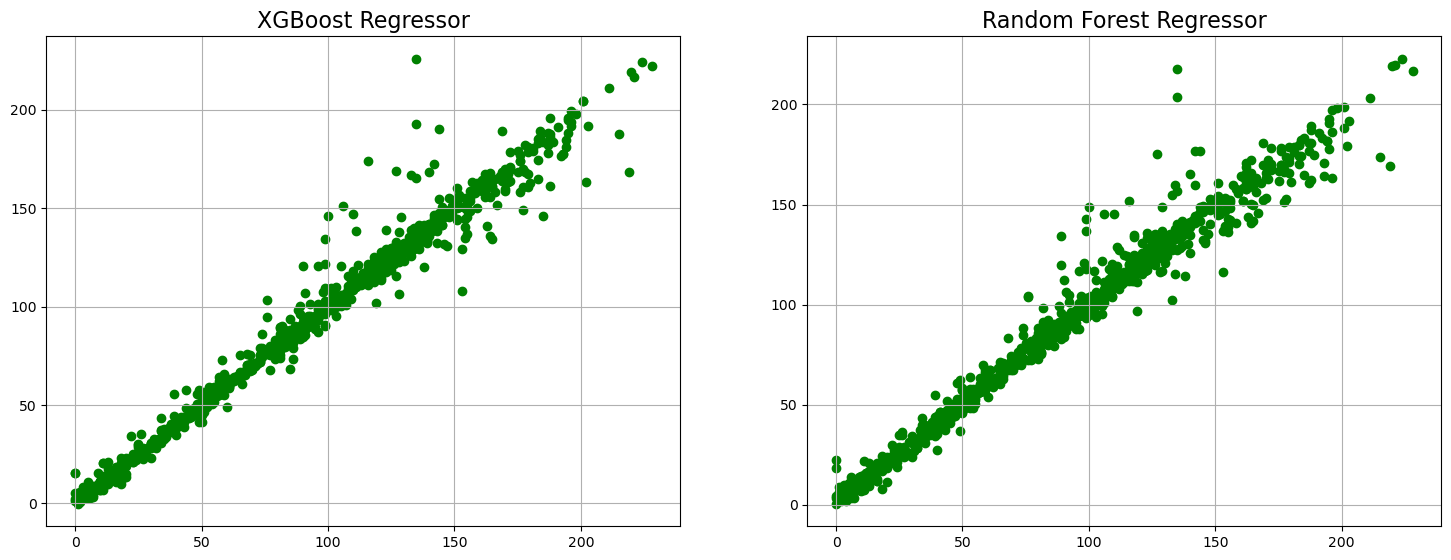

In [138]:
plt.rcParams["figure.figsize"] = (18, 14) 

plt.subplot(2,2,1)
plt.title("XGBoost Regressor", fontsize=16)
plt.scatter(sample_xgb['Actual'], sample_xgb['Predict'], c='g')
plt.grid()

plt.subplot(2,2,2)
plt.title("Random Forest Regressor", fontsize=16)
plt.scatter(sample_rf['Actual'], sample_rf['Predict'], c='g')
plt.grid()

# model extraction

In [139]:
#Model Extraction
pickle.dump(pipe, open('ssm_mens_score_prediction_final_model.pkl','wb'))

# win probability (first innings)

In [140]:
#load data
first_innings_win_portability_df = pickle.load(open('ssm_mens_first_innings_win.pkl','rb'))
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Central Districts,Auckland,Auckland,192,0
1,Central Districts,Auckland,Auckland,192,0
2,Central Districts,Auckland,Auckland,192,0
3,Central Districts,Auckland,Auckland,192,0
4,Central Districts,Auckland,Auckland,192,0
...,...,...,...,...,...
20397,Otago,Northern Districts,Hamilton,143,0
20398,Otago,Northern Districts,Hamilton,143,0
20399,Otago,Northern Districts,Hamilton,143,0
20400,Otago,Northern Districts,Hamilton,143,0


In [141]:
first_innings_win_portability_df.to_csv(r'ssm_mens_first_innings_win.csv', index=False, header=True)
first_innings_win_portability_df = pd.read_csv(r'ssm_mens_first_innings_win.csv')
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Central Districts,Auckland,Auckland,192,0
1,Central Districts,Auckland,Auckland,192,0
2,Central Districts,Auckland,Auckland,192,0
3,Central Districts,Auckland,Auckland,192,0
4,Central Districts,Auckland,Auckland,192,0
...,...,...,...,...,...
20397,Otago,Northern Districts,Hamilton,143,0
20398,Otago,Northern Districts,Hamilton,143,0
20399,Otago,Northern Districts,Hamilton,143,0
20400,Otago,Northern Districts,Hamilton,143,0


In [142]:
X1 = first_innings_win_portability_df.drop(columns=['result_first_innings'])
y1 = first_innings_win_portability_df['result_first_innings'].values

X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, test_size=0.1, random_state=1)

In [143]:
X1_train

,batting_team,bowling_team,city,runs_y
612,Northern Districts,Otago,Hamilton,212
12624,Otago,Canterbury,Christchurch,162
12395,Canterbury,Wellington,Wellington,153
8468,Northern Districts,Canterbury,Christchurch,219
19252,Central Districts,Northern Districts,Hamilton,110
...,...,...,...,...
10955,Central Districts,Otago,Dunedin,223
17289,Canterbury,Auckland,Christchurch,147
5192,Central Districts,Wellington,Wellington,161
12172,Otago,Wellington,Wellington,137


In [144]:
trf1 = ColumnTransformer([
    ('trf1', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

In [145]:
pipe1 = Pipeline(steps=[
    ('step1',trf1),
    ('step2', LogisticRegression()) #solver='liblinear'
])

pipe1.fit(X1_train, y1_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [146]:
y1_pred = pipe1.predict(X1_test)

print('Accuracy Score: '+str(accuracy_score(y1_test,y1_pred)*100))

Accuracy Score: 78.0499755022048


In [147]:
confusion_matrix_lr = confusion_matrix(y1_test, y1_pred)
confusion_matrix_lr

array([[931, 231],
       [217, 662]], dtype=int64)

In [148]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1162
           1       0.74      0.75      0.75       879

    accuracy                           0.78      2041
   macro avg       0.78      0.78      0.78      2041
weighted avg       0.78      0.78      0.78      2041



In [149]:
pipe1.predict_proba(X1_test)[4]

array([0.13728983, 0.86271017])

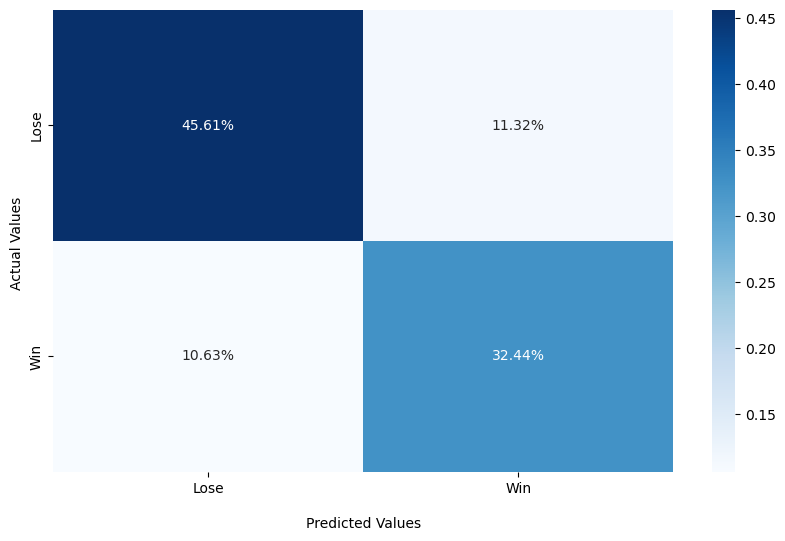

In [150]:
plt.rcParams["figure.figsize"] = (10, 6) 

ax = sns.heatmap(confusion_matrix_lr/np.sum(confusion_matrix_lr), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Logistic Regression\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
input_df = pd.DataFrame({'batting_team': ['Peshawar Zalmi'], 'bowling_team': ['Quetta Gladiators'], 'city': ['Sharjah'], 'runs_y': [190]})
result = pipe1.predict_proba(input_df)

loss = result[0][1]
win = result[0][0]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

win: 42%
loss: 58%


# Model Extraction

In [151]:
#Model Extraction
pickle.dump(pipe1, open('ssm_1st_innings_win_prediction_final_model.pkl','wb'))

# win probability (second innings)

In [152]:
#load data
second_innings_win_portability_df = pickle.load(open('ssm_mens_second_innings_win.pkl','rb'))
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Auckland,Central Districts,Auckland,0,193,193,119,10,0.00,9.73,1
1,Auckland,Central Districts,Auckland,6,193,187,118,10,18.00,9.51,1
2,Auckland,Central Districts,Auckland,11,193,182,117,10,22.00,9.33,1
3,Auckland,Central Districts,Auckland,11,193,182,116,10,16.50,9.41,1
4,Auckland,Central Districts,Auckland,15,193,178,115,10,18.00,9.29,1
...,...,...,...,...,...,...,...,...,...,...,...
18683,Northern Districts,Otago,Hamilton,131,144,13,10,5,7.15,7.80,1
18684,Northern Districts,Otago,Hamilton,135,144,9,9,5,7.30,6.00,1
18685,Northern Districts,Otago,Hamilton,136,144,8,8,5,7.29,6.00,1
18686,Northern Districts,Otago,Hamilton,138,144,6,7,5,7.33,5.14,1


In [153]:
second_innings_win_portability_df.to_csv(r'ssm_mens_second_innings_win.csv', index=False, header=True)
second_innings_win_portability_df = pd.read_csv(r'ssm_mens_second_innings_win.csv')
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Auckland,Central Districts,Auckland,0,193,193,119,10,0.00,9.73,1
1,Auckland,Central Districts,Auckland,6,193,187,118,10,18.00,9.51,1
2,Auckland,Central Districts,Auckland,11,193,182,117,10,22.00,9.33,1
3,Auckland,Central Districts,Auckland,11,193,182,116,10,16.50,9.41,1
4,Auckland,Central Districts,Auckland,15,193,178,115,10,18.00,9.29,1
...,...,...,...,...,...,...,...,...,...,...,...
18622,Northern Districts,Otago,Hamilton,131,144,13,10,5,7.15,7.80,1
18623,Northern Districts,Otago,Hamilton,135,144,9,9,5,7.30,6.00,1
18624,Northern Districts,Otago,Hamilton,136,144,8,8,5,7.29,6.00,1
18625,Northern Districts,Otago,Hamilton,138,144,6,7,5,7.33,5.14,1


In [154]:
X2 = second_innings_win_portability_df.drop(columns=['result'])
y2 = second_innings_win_portability_df['result'].values

X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.1, random_state=1)

In [155]:
X2_train

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr
11355,Northern Districts,Auckland,Hamilton,15,163,148,107,10,6.92,8.30
14834,Auckland,Otago,Auckland,30,131,101,78,4,4.29,7.77
14668,Wellington,Central Districts,New Plymouth,228,228,0,1,2,11.50,0.00
6343,Auckland,Northern Districts,Hamilton,153,196,43,15,3,8.74,17.20
18619,Northern Districts,Otago,Hamilton,128,144,16,13,5,7.18,7.38
...,...,...,...,...,...,...,...,...,...,...
10955,Northern Districts,Canterbury,Hamilton,58,119,61,83,9,9.41,4.41
17289,Central Districts,Canterbury,Christchurch,4,190,186,116,10,6.00,9.62
5192,Canterbury,Wellington,Christchurch,108,133,25,41,8,8.20,3.66
12172,Wellington,Canterbury,Wellington,14,176,162,114,10,14.00,8.53


In [156]:
trf2 = ColumnTransformer([
    ('trf2', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

In [157]:
pipe2 = Pipeline(steps=[
    ('step1',trf2),
    ('step2',LogisticRegression()) #solver='liblinear'
])

pipe2.fit(X2_train,y2_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [158]:
y2_pred = pipe2.predict(X2_test)
print('Accuracy Score: '+str(accuracy_score(y2_test, y2_pred)*100))

Accuracy Score: 84.21900161030595


In [159]:
confusion_matrix1 = confusion_matrix(y2_test, y2_pred)
confusion_matrix1

array([[666, 137],
       [157, 903]], dtype=int64)

In [160]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       803
           1       0.87      0.85      0.86      1060

    accuracy                           0.84      1863
   macro avg       0.84      0.84      0.84      1863
weighted avg       0.84      0.84      0.84      1863



In [161]:
pipe2.predict_proba(X2_test)[10]

array([0.04500524, 0.95499476])

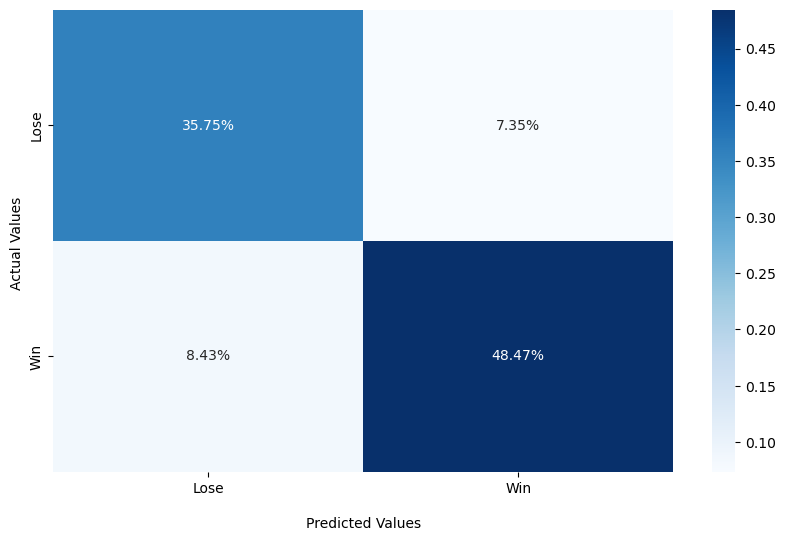

In [162]:
plt.rcParams["figure.figsize"] = (10, 6) 

ax = sns.heatmap(confusion_matrix1/np.sum(confusion_matrix1), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Model-1\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [53]:
input_df = pd.DataFrame({'batting_team': ['Peshawar Zalmi'], 'bowling_team': ['Quetta Gladiators'], 'city': ['Sharjah'], 'current_score':[159], 'target_runs':[169], 'runs_left':[10], 'balls_left': [2], 'wickets_left':[7], 'crr':[8.08], 'rrr': [30.0]})
result = pipe2.predict_proba(input_df)

loss = result[0][0]
win = result[0][1]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

win: 5%
loss: 95%


# Model Extraction

In [310]:
#Model Extraction
pickle.dump(pipe2, open('ssm_2nd_innings_win_prediction_final_model.pkl','wb'))